#    Linear Regression on Boston

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
 from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [17]:

# Fetch the California housing dataset
housing = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Optionally, add the target variable
df['target'] = housing.target

# Display the DataFrame
print(df.head(3))


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  


In [18]:
x=df
y=df.target

In [19]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_test,y_train=train_test_split(x,y,test_size=0.33,random_state=42)

In [30]:
x_train.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28,1.214
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23,3.637
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26,2.056


In [31]:
y_train.head(3)

20046    0.47700
3024     0.45800
15663    5.00001
Name: target, dtype: float64

In [29]:
x_test.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001


In [28]:
y_test.head(3)

5088     1.214
17096    3.637
5617     2.056
Name: target, dtype: float64

In [34]:
scaler =StandardScaler()

In [36]:
x_train=scaler.fit_transform(x_train)

In [37]:
x_test=scaler.fit_transform(x_test)

In [38]:
x_train

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.78315293,
         0.65090402, -0.73904434],
       [ 0.18205382,  0.3523991 ,  0.30748451, ...,  0.8475975 ,
        -1.31911678,  1.36115317],
       [-0.17232772,  1.06666717, -0.25107784, ..., -0.87218816,
         0.66087881, -0.0092192 ],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ..., -0.75972261,
         0.60103008,  0.13379879],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.90383028,
        -1.18445713,  0.66599906],
       [-0.68377427,  1.86029835, -0.83041358, ...,  0.9928655 ,
        -1.41387727,  1.02571098]])

In [39]:
x_test

array([[-1.15004883, -0.30283646, -0.48402456, ...,  0.21852245,
         0.26423782, -1.38209296],
       [-0.70099345,  0.09547254, -0.14831375, ..., -0.2115367 ,
         0.03922932, -1.39855202],
       [-0.19980096,  1.84803215, -0.56924017, ...,  1.03189519,
        -1.45082702,  2.53603826],
       ...,
       [-0.01206507, -1.09945447,  0.39868138, ...,  1.45727978,
        -0.93080736, -0.86839704],
       [ 0.28390685, -1.49776347,  0.29357284, ..., -0.70236507,
         1.07426845, -0.66309192],
       [-0.58911258,  1.76837035, -0.61679693, ...,  1.02254608,
        -1.46582758,  0.86500187]])

In [43]:
print(len(x_train), len(y_train))

13828 6812


In [41]:
# cross validation
regression =LinearRegression()

In [45]:
# Perform cross-validation
scores = cross_val_score(regression, x_train, y_train, scoring="neg_mean_squared_error", cv=5)
print(scores)


x_train size: (13828, 8)
y_train size: (13828,)
[-0.54099828 -0.49871687 -0.50480739 -0.5200183  -0.55070903]


In [46]:
print("Cross-validation MSE scores:", -scores)
print("Average cross-validation MSE:", -np.mean(scores))

Cross-validation MSE scores: [0.54099828 0.49871687 0.50480739 0.5200183  0.55070903]
Average cross-validation MSE: 0.5230499763383933


In [47]:
regression.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = regression.predict(x_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.5369686543372459
R^2 Score: 0.5970494128783953


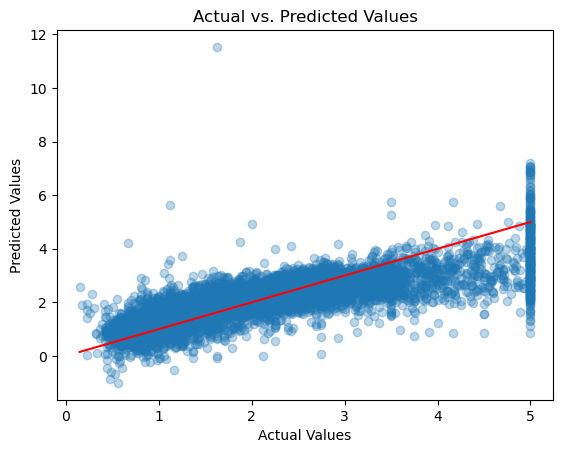

In [56]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()